In [ ]:
#https://towardsdatascience.com/5-powerful-scikit-learn-models-e9b12375320d
#Random Forest
#Random Forest is a popular ensemble model used quite frequently. You can see ensemble models popping up all over the place, especially in Kaggle competitions. Random forest works by fitting decision tree classifiers on subsamples of the dataset. It then averages classification performance to garner superior accuracy whilst avoiding overfitting. We set n_estimators to 100 which sets the number of trees in the forest to 100. Max depth sets the maximum depth of the tree.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [2]:
import matplotlib
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [4]:
print(list(iris.keys()))
# print(iris["data"])
# print(iris["target"])
print(iris["DESCR"])

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.2

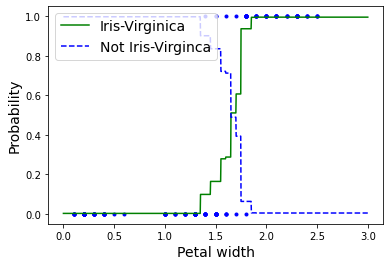

In [5]:
X = iris["data"][:,3:]  # petal width
y = (iris["target"]==2).astype(np.int)

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X,y)

X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = clf.predict_proba(X_new)

plt.plot(X,y,"b.")
plt.plot(X_new,y_proba[:,1],"g-",label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",label="Not Iris-Virginca")
plt.xlabel("Petal width", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.show()

In [6]:
clf.predict([[1.7],[1.5]])

iris = datasets.load_iris()

X = iris["data"][:,(2,3)]  # petal length, petal width
y = iris["target"]

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X,y)

RandomForestClassifier(max_depth=2, random_state=0)

In [7]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
print(Z)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


<ipython-input-8-bb3990fc5086>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


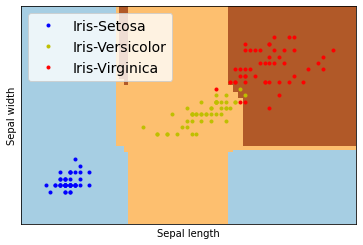

In [8]:
plt.figure(1, figsize=(6,4))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.figure(1, figsize=(4, 3))
#plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "b.", label="Iris-Setosa")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "y.", label="Iris-Versicolor")
plt.plot(X[:, 0][y==2], X[:, 1][y==2], "r.", label="Iris-Virginica")
plt.legend(loc="upper left", fontsize=14)

plt.show()